In [21]:
import os
import nltk
import pyphen
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize

# Function to count syllables in a word


def count_syllables(word):
    dic = pyphen.Pyphen(lang='en')
    return len(dic.inserted(word).split('-'))

# Function to calculate averages and standard deviations


def calculate_avg_std(values):
    return np.mean(values), np.std(values)


# Directory containing the text files
directory = '/Users/abdelazimlokma/Desktop/works_to_analyze'

# Process each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            text = file.read()

            # Tokenize by sentences and words
            sentences = sent_tokenize(text)
            words = word_tokenize(text)

            # Metrics for each file
            sentence_lengths = [len(word_tokenize(sent)) for sent in sentences]
            word_lengths = [len(word) for word in words]
            syllable_lengths = [count_syllables(word) for word in words]
            words_gt_5_syllables = [
                1 for word in words if count_syllables(word) >= 5]

            # Calculate averages and standard deviations for each file
            avg_sentence_length, std_sentence_length = calculate_avg_std(
                sentence_lengths)
            avg_word_length, std_word_length = calculate_avg_std(word_lengths)
            avg_syllable_length, std_syllable_length = calculate_avg_std(
                syllable_lengths)
            avg_words_gt_5_syllables, std_words_gt_5_syllables = calculate_avg_std(
                words_gt_5_syllables)

            # Print the results for each file
            print(f'File: {filename}')
            print(
                f'Average Sentence Length: {avg_sentence_length}, Standard Deviation: {std_sentence_length}')
            print(
                f'Average Word Length: {avg_word_length}, Standard Deviation: {std_word_length}')
            print(
                f'Average Syllable Length per Word: {avg_syllable_length}, Standard Deviation: {std_syllable_length}')
            print()


File: Nietzsche_Ludovici_Notes_final.txt
Average Sentence Length: 33.03809523809524, Standard Deviation: 24.06792918843458
Average Word Length: 4.238932948810382, Standard Deviation: 2.853427039426897
Average Syllable Length per Word: 1.3695746214852198, Standard Deviation: 0.7921551417395974

File: Cleaned_Doc6_Nietzsche_Ludovici_Text.txt
Average Sentence Length: 30.938660329719294, Standard Deviation: 23.651423240169585
Average Word Length: 4.252727045764437, Standard Deviation: 2.934669922610612
Average Syllable Length per Word: 1.3792706112807513, Standard Deviation: 0.7825783598842202

File: Nietzsche_Kaufmann_Notes_final.txt
Average Sentence Length: 34.34340222575517, Standard Deviation: 30.63093361275898
Average Word Length: 4.222957432686222, Standard Deviation: 2.916279990494371
Average Syllable Length per Word: 1.3827405055801103, Standard Deviation: 0.7740613063572851

File: Plato_Reeve_Notes_final.txt
Average Sentence Length: 27.03711790393013, Standard Deviation: 17.349374

In [20]:
import os
import spacy
import numpy as np

# Function to calculate the depth of a node in the parse tree


def max_depth(node):
    if not list(node.children):
        return 1
    else:
        return 1 + max(max_depth(child) for child in node.children)

# Function to calculate the average depth of parse trees in a file


def calculate_average_depth(fn, nlp):
    depths = []

    with open(fn, 'r', encoding='utf-8') as file:
        while True:
            text = file.read(1000000)
            if not text:
                break

            doc = nlp(text)
            for sent in doc.sents:
                if len(sent) >= 5:
                    root = sent.root
                    depth = max_depth(root)
                    depths.append(depth)

    average_depth = np.mean(depths) if depths else 0
    std_deviation = np.std(depths) if depths else 0

    return average_depth, std_deviation


# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Directory containing the text files
directory = '/Users/abdelazimlokma/Desktop/works_to_analyze'

# Process each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        average_depth, std_deviation = calculate_average_depth(filepath, nlp)
        print(f'File: {filename}')
        print(
            f"Average Parse Tree Depth: {average_depth}, Standard Deviation: {std_deviation}")
        print()


File: Nietzsche_Ludovici_Notes_final.txt
Average Parse Tree Depth: 8.142105263157895, Standard Deviation: 3.2534703398183242

File: Cleaned_Doc6_Nietzsche_Ludovici_Text.txt
Average Parse Tree Depth: 7.217352547912643, Standard Deviation: 2.685600830962422

File: Nietzsche_Kaufmann_Notes_final.txt
Average Parse Tree Depth: 7.115157646265385, Standard Deviation: 2.816909084024224

File: Plato_Reeve_Notes_final.txt
Average Parse Tree Depth: 7.28193832599119, Standard Deviation: 2.5842252284657015

File: Nietzsche_Kaufmann_text_final.txt
Average Parse Tree Depth: 7.116059379217274, Standard Deviation: 2.8183941057285713

File: Plato_Bloom_Text.txt
Average Parse Tree Depth: 7.117562033245001, Standard Deviation: 3.05796524901308

File: Plato_Bloom_Notes_final.txt
Average Parse Tree Depth: 7.116059379217274, Standard Deviation: 2.8183941057285713

File: Plato_Reeve_Text2.txt
Average Parse Tree Depth: 6.083588833306439, Standard Deviation: 2.747707275053131



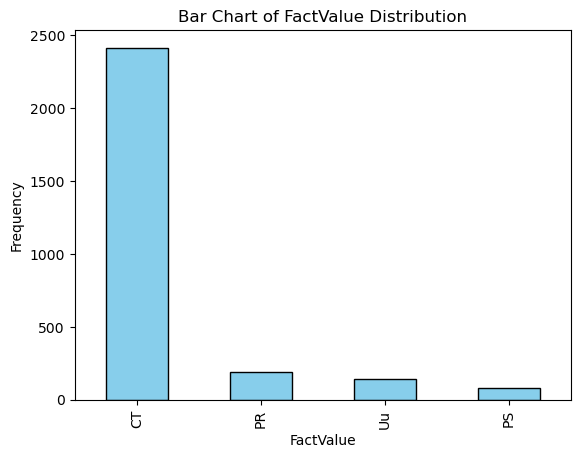

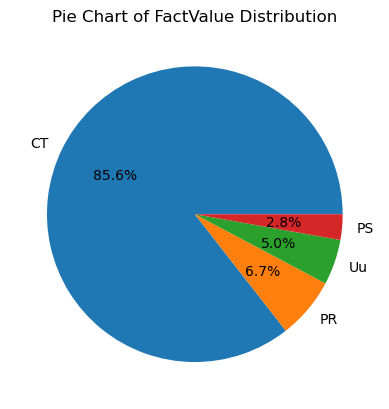

                                                sent    eText factValue
0  In the U.S. over-the-counter market, American ...   closed        CT
1  He said the company has no intention of tappin...  tapping        PR
2  Ford might succeed because many shareholders a...  succeed        PS
3  It allows us to spread his name far and wide a...      say        Uu


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
# Replace with your actual file path
df = pd.read_csv('/Users/abdelazimlokma/Desktop/fb_cleaned_data.csv')

# Bar chart for the distribution of 'factValue'
fact_value_counts = df['factValue'].value_counts()
fact_value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of FactValue Distribution')
plt.xlabel('FactValue')
plt.ylabel('Frequency')
plt.show()

# Pie chart for the distribution of 'factValue'
fact_value_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of FactValue Distribution')
plt.ylabel('')  # This hides the 'factValue' label on the side
plt.show()

# Sample one row from each 'factValue' class
sampled_rows = df.groupby('factValue').apply(
    lambda x: x.sample(1)).reset_index(drop=True)
print(sampled_rows)
